In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_customers=pd.read_csv('customers.csv')
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [4]:
df_trans=pd.read_csv('transactions.csv')
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [5]:
df_cs=pd.read_csv('credit_profiles.csv')
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [6]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [7]:
df_customers.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [8]:
df_customers[df_customers.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married


In [9]:
print(df_customers[df_customers.occupation=='Artist'].annual_income.median())

45794.0


In [10]:
print(df_customers[df_customers.occupation=='Freelancer'].annual_income.median())

46759.0


In [11]:
print(df_customers[df_customers.occupation=='Business Owner'].annual_income.median())

261191.5


In [12]:
occup_wise_median=df_customers.groupby('occupation')['annual_income'].median()
occup_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [13]:
def get_income_median(row):
    if pd.isnull(row['annual_income']):
        return occup_wise_median[row['occupation']]
    else:
        return row['annual_income']

In [14]:
get_income_median({"cust_id":3245,"occupation":"Artist","annual_income":None})

np.float64(45794.0)

In [15]:
df_customers['annual_income']=df_customers.apply(get_income_median,axis=1)
# optimize method using lambda
# df_customers['annual_income']=df_customers.apply(
#     lambda row: occup_wise_median[row['occupation']] if pd.isnull(row['annual_income']) else row['occupation']
#     ,axis=1)

In [16]:
df_customers.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [17]:
df_customers.iloc[[14,22,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
22,23,Ishan Patel,Male,19,City,Freelancer,36863.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


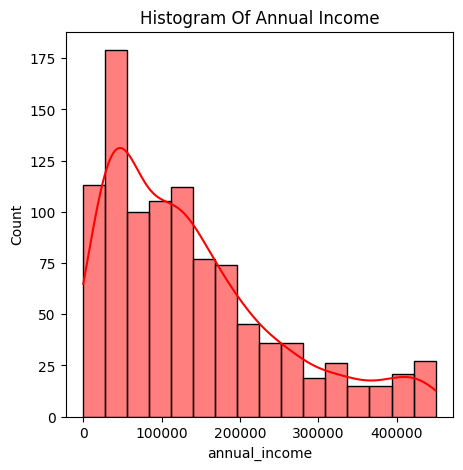

In [18]:
plt.figure(figsize=(5,5))
sns.histplot(df_customers['annual_income'],kde=True,color='red',label='Data')
plt.title('Histogram Of Annual Income')
plt.show()

In [19]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [20]:
df_customers[df_customers.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [21]:
for index, row in df_customers.iterrows():
    if row['annual_income']<100:
        df_customers.at[index, "annual_income"]=occup_wise_median[row['occupation']]

In [22]:
df_customers[df_customers.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [23]:
df_customers.iloc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


In [24]:
occup_wise_mean=df_customers.groupby('occupation')['annual_income'].mean()
occup_wise_mean

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

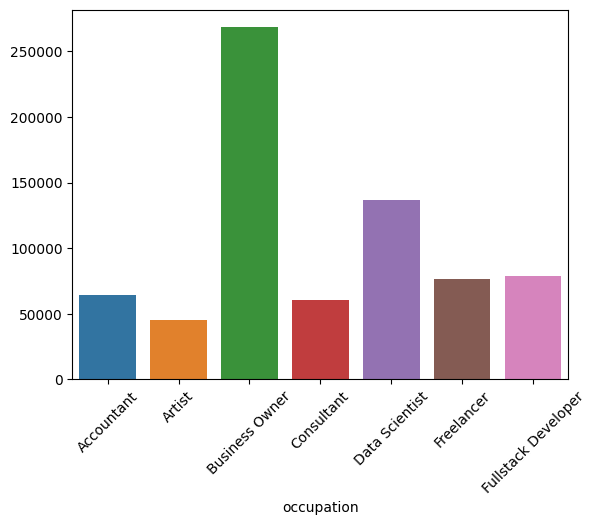

In [25]:
sns.barplot(x=occup_wise_mean.index,y=occup_wise_mean.values, palette='tab10')
plt.xticks(rotation=45)
plt.show()

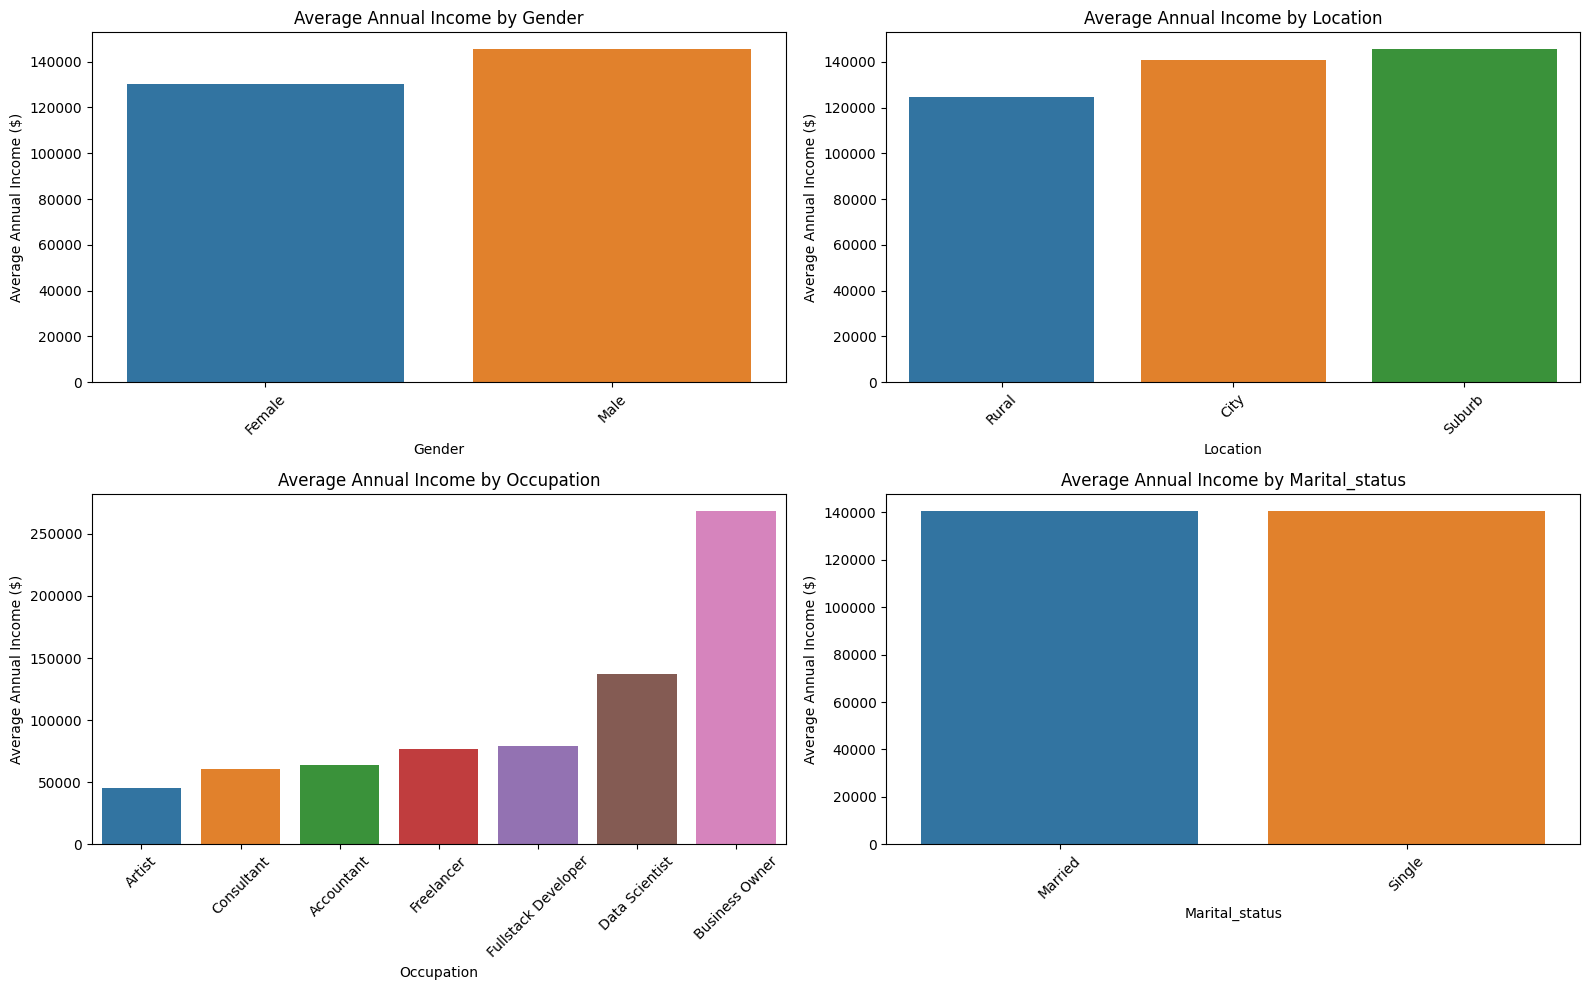

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Flatten to easily index in loop

for i, col in enumerate(categorical_columns):
    avg_group = df_customers.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_group.index, y=avg_group.values, palette='tab10', ax=axes[i])
    axes[i].set_title(f'Average Annual Income by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Annual Income ($)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [27]:
# outliers in age
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [28]:
outliers=df_customers[(df_customers['age']<15) | (df_customers['age']>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [29]:
df_customers.age.median()

np.float64(32.0)

In [30]:
median_age_per_occupation=df_customers.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [31]:
for index, row in df_customers.iterrows():
     df_customers.at[index,'age']=median_age_per_occupation[row['occupation']]

In [32]:
df_customers[(df_customers.age<15) | (df_customers.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [33]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.123000,140483.548500
std,288.819436,11.199478,110463.002934
min,1.000000,24.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,51.000000,195514.250000
max,1000.000000,51.000000,449346.000000


In [34]:
bins=[17,25,48,65]
labels=['18-25','26-48','49-65']
df_customers['age_group']=pd.cut(df_customers['age'],bins=bins,labels=labels)

In [35]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,46.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,24.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,46.0,City,Consultant,39406.0,Married,26-48


In [36]:
age_group_counts=df_customers['age_group'].value_counts(normalize=True)*100
# normalize gives value in percentage
age_group_counts

age_group
26-48    48.3
49-65    28.9
18-25    22.8
Name: proportion, dtype: float64

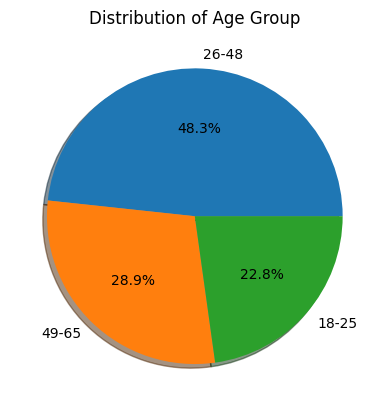

In [37]:
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of Age Group')
plt.show()

In [38]:
df_customers.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [39]:
df_customers.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [40]:
cust_loc_gen=df_customers.groupby(['location','gender']).size().unstack()
cust_loc_gen

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


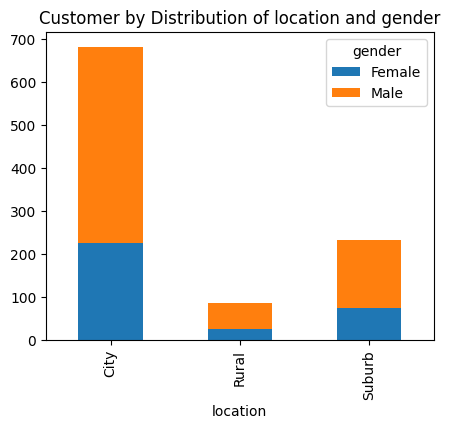

In [41]:
cust_loc_gen.plot(kind='bar',stacked=True,figsize=(5,4))
plt.title('Customer by Distribution of location and gender')
plt.show()

In [42]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [43]:
df_cs.shape

(1004, 6)

In [44]:
df_cs.cust_id.nunique()

1000

In [45]:
df_cs[df_cs.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [46]:
df_cs_clean=df_cs.drop_duplicates(subset="cust_id",keep='last')
df_cs_clean

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [47]:
df_cs_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [48]:
df_cs_clean[df_cs_clean.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [49]:
df_cs_clean.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

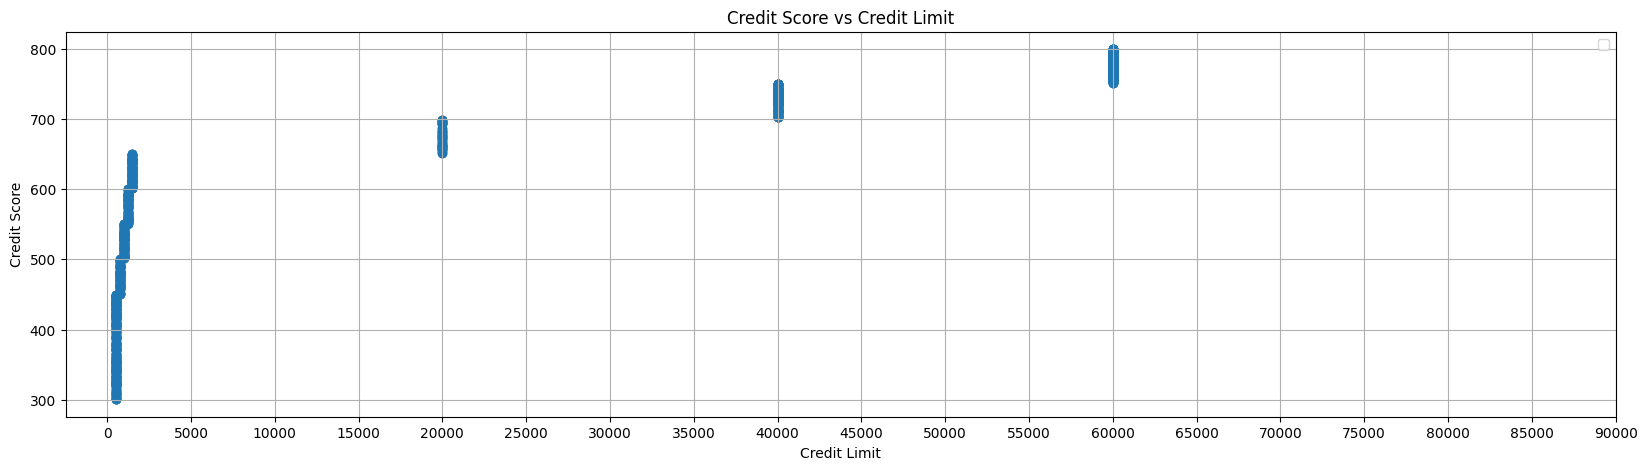

In [50]:
plt.figure(figsize=(20,5))
plt.scatter(df_cs_clean.credit_limit, df_cs_clean.credit_score)
plt.title('Credit Score vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0,90001,5000))
plt.legend()
plt.grid(True)
plt.show()

In [51]:
bin_range=[300,450,500,550,600,650,700,750,800]
bin_labels=[f'{start}-{end-1}' for start, end in zip(bin_range,bin_range[1:])]
df_cs_clean['credit_score_range']=pd.cut(df_cs_clean['credit_score'],bins=bin_range,labels=bin_labels, include_lowest=True, right=False)

In [52]:
df_cs_clean.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [53]:
df_cs_clean[df_cs_clean.credit_score_range=='700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [54]:
mode_df=df_cs_clean.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()

In [55]:
df_cs_clean[df_cs_clean.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
954,951,513,0.175914,131.0,3.0,NaN,500-549
562,562,507,0.592631,409.0,4.0,NaN,500-549
37,38,514,0.296971,238.0,2.0,NaN,500-549


In [56]:
df_cs_clean2=pd.merge(df_cs_clean,mode_df,on='credit_score_range',suffixes=("","_mode"))

In [57]:
df_cs_clean2[df_cs_clean2.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
471,472,778,0.262706,12502.0,1.0,NaN,750-799,60000.0
83,84,733,0.525567,16663.0,1.0,NaN,700-749,40000.0
206,207,771,0.162478,6595.0,3.0,NaN,750-799,60000.0


In [58]:
df_cs_clean3=df_cs_clean2.copy()
df_cs_clean3['credit_limit'].fillna(df_cs_clean3['credit_limit_mode'],inplace=True)
df_cs_clean3.shape

(1000, 8)

In [59]:
df_cs_clean3[df_cs_clean3['credit_limit'].isnull()].shape

(0, 8)

In [60]:
df_cs_clean3[df_cs_clean3['cust_id']==850]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
849,850,787,0.29352,11195.0,3.0,60000.0,750-799,60000.0


In [61]:
 df_cs_clean3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<Axes: xlabel='outstanding_debt'>

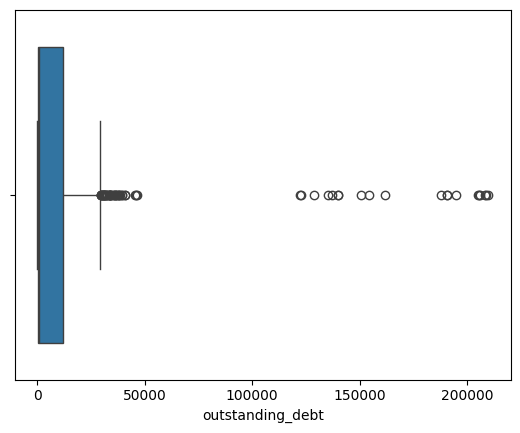

In [62]:
sns.boxplot(x=df_cs_clean3.outstanding_debt)

In [63]:
df_cs_clean3[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [64]:
df_cs_clean3.loc[df_cs_clean3.outstanding_debt>df_cs_clean3.credit_limit,'outstanding_debt']=df_cs_clean3

In [65]:
df_merged=df_customers.merge(df_cs_clean3,on='cust_id',how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,46.0,City,Consultant,65172.0,Single,26-48,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,24.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,46.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [66]:
df_merged[['credit_score','credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [67]:
numerical_cols=['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']

correlation_matrix=df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.306026,0.847952,0.575751,0.433914
credit_utilisation,-0.070445,1.000000,0.046540,-0.080493,-0.086368,-0.017035
outstanding_debt,0.306026,0.046540,1.000000,0.365307,0.276196,0.237536
credit_limit,0.847952,-0.080493,0.365307,1.000000,0.684775,0.509746
annual_income,0.575751,-0.086368,0.276196,0.684775,1.000000,0.626890
age,0.433914,-0.017035,0.237536,0.509746,0.626890,1.000000


<Axes: >

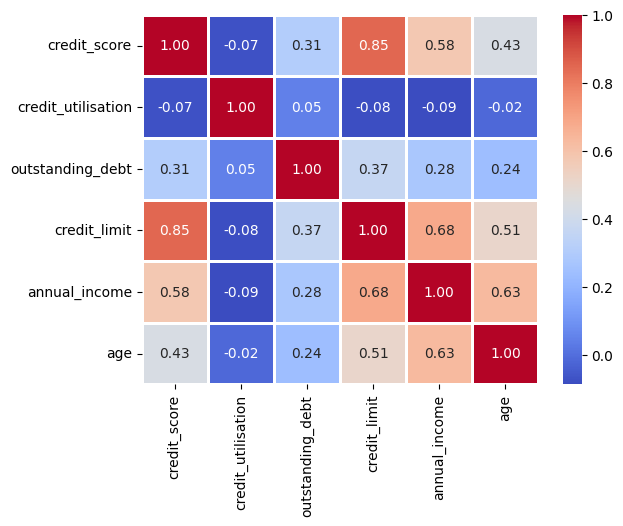

In [68]:
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.8 )

In [69]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [70]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [71]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [78]:
df_trans.platform.mode()[0]

'Amazon'

In [73]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

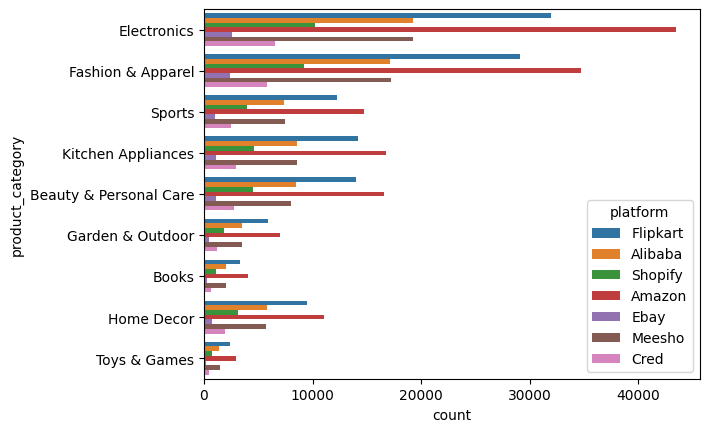

In [76]:
sns.countplot(y="product_category",hue="platform",data=df_trans)

In [79]:
df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)

In [80]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

# Outlier Treatment using IQR & Domain Knowledge 

In [82]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [86]:
df_trans_zero=df_trans[df_trans.tran_amount==0]
df_trans_zero.shape

(4734, 7)

In [88]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [87]:
df_trans_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [89]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [91]:
df_trans_1=df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=='Electronics')&(df_trans.payment_type=='Credit Card')]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [94]:
median_amount=df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()

In [95]:
median_amount

np.float64(554.0)

In [98]:
df_trans['tran_amount'].replace(0,median_amount,inplace=True)

<Axes: xlabel='tran_amount', ylabel='Count'>

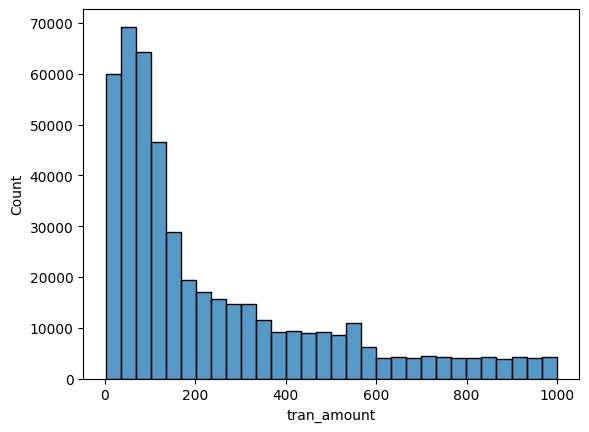

In [101]:
sns.histplot(df_trans[df_trans.tran_amount<10000].tran_amount,bins=30)

# use IQR for Skewed Distribution

In [103]:
q1,q3=df_trans['tran_amount'].quantile([0.25,0.75])
iqr=q3-q1
lower=q1-(2*iqr)
upper=q3+(2*iqr)
lower,upper

(-628.0, 1107.0)

In [119]:
amt_outliers=df_trans[df_trans.tran_amount>=upper]
amt_outliers.shape

(0, 7)

In [108]:
df_trans_normal=df_trans[df_trans.tran_amount<upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [117]:
tran_mean_per_cat=df_trans_normal.groupby('product_category')['tran_amount'].mean()
tran_mean_per_cat

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [114]:
tran_mean_per_cat=df_trans_normal.groupby('product_category')['tran_amount'].mean()

In [115]:
df_trans.loc[amt_outliers.index,'tran_amount']=amt_outliers['product_category'].map(tran_mean_per_cat)

In [116]:
df_trans.loc[amt_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

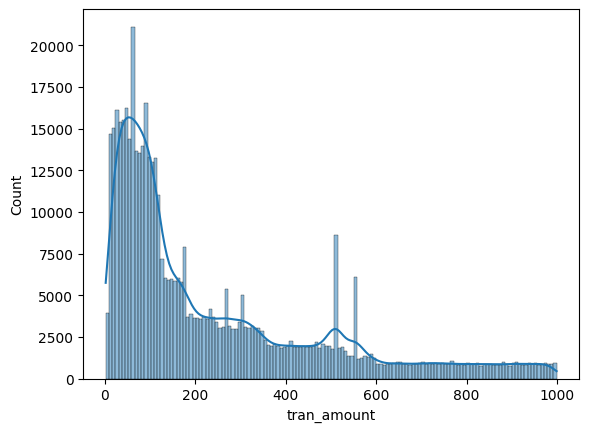

In [122]:
sns.histplot(df_trans.tran_amount,kde=True,)

In [120]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

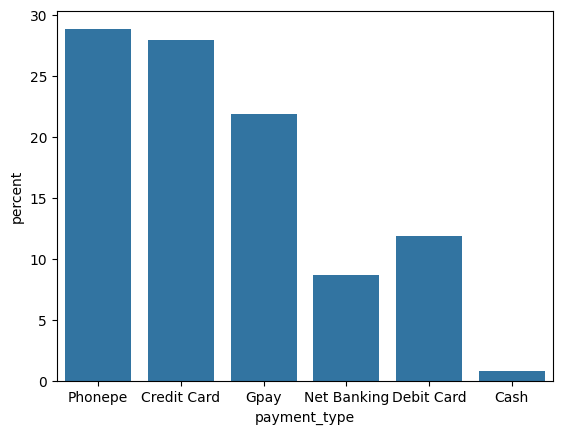

In [124]:
sns.countplot(x=df_trans.payment_type,stat='percent')

In [126]:
df_merged.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,46.0,City,Consultant,65172.0,Single,26-48,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,24.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0


In [129]:
# merged dataframe
df_merged_2=pd.merge(df_merged,df_trans,on='cust_id',how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


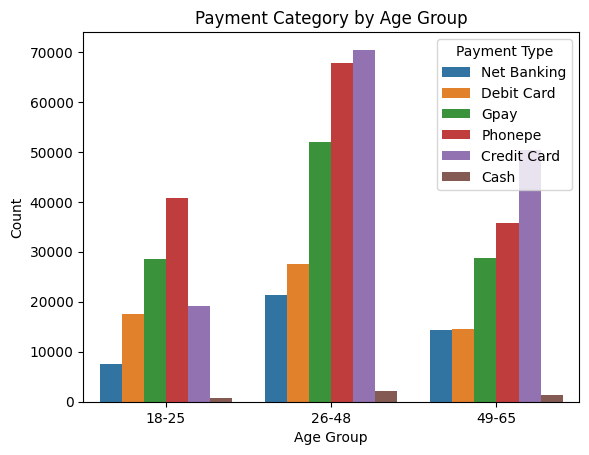

In [139]:
sns.countplot(x='age_group',hue='payment_type',data=df_merged_2)
plt.title('Payment Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Payment Type',loc='upper right')
plt.xticks(rotation=0)
plt.show()

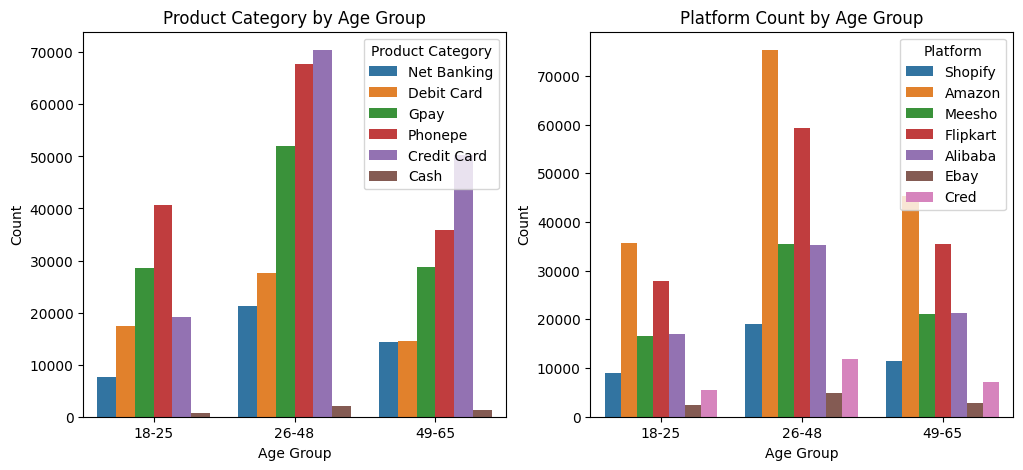

In [140]:
fix,(ax1, ax2 )=plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='age_group',hue='payment_type',data=df_merged_2,ax=ax1)
ax1.set_title('Product Category by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title='Product Category',loc='upper right')

sns.countplot(x='age_group',hue='platform',data=df_merged_2,ax=ax2)
ax2.set_title('Platform Count by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.legend(title='Platform',loc='upper right')
plt.show()


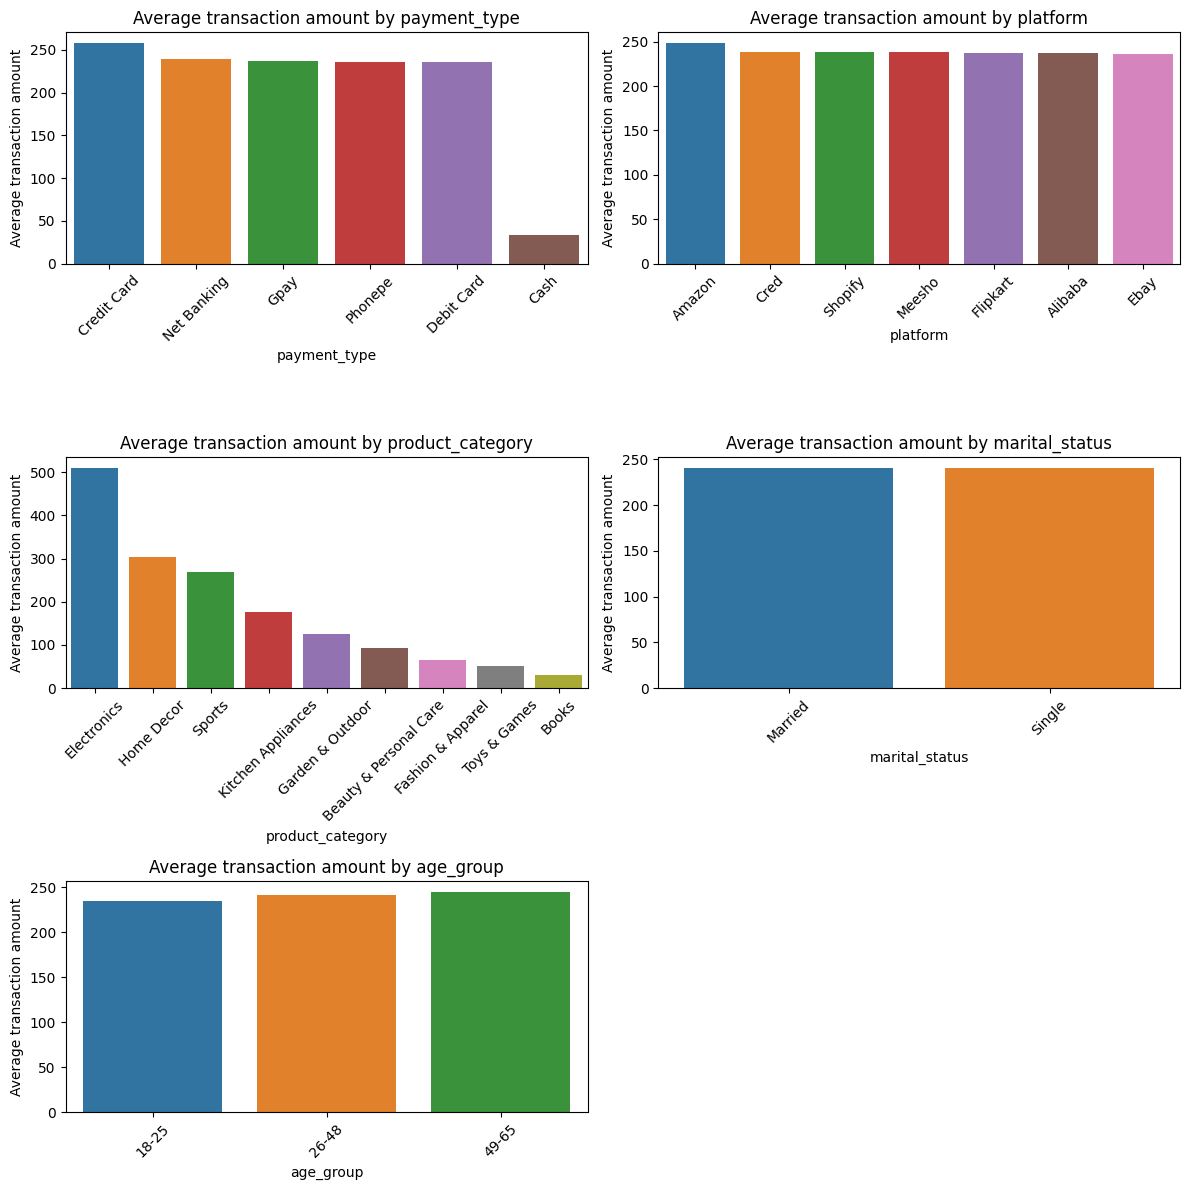

In [141]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()